100%|██████████| 48.6k/48.6k [00:00<00:00, 197kB/s]

Extracting files...


Path to dataset files: C:\Users\Rohith S D\.cache\kagglehub\datasets\yasserh\breast-cancer-dataset\versions\1

--- Evaluation ---
Linear Kernel Accuracy: 0.99
RBF Kernel Accuracy: 0.96

Confusion Matrix (Linear Kernel):
[[71  0]
 [ 1 42]]

Confusion Matrix (RBF Kernel):
[[71  0]
 [ 4 39]]

Cross-validation Accuracy (Linear): 0.9525850023288308
Cross-validation Accuracy (RBF): 0.9402732494954199


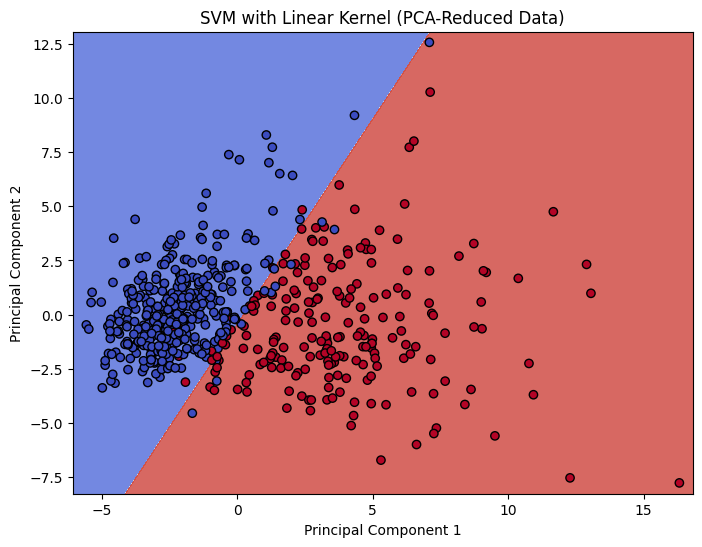

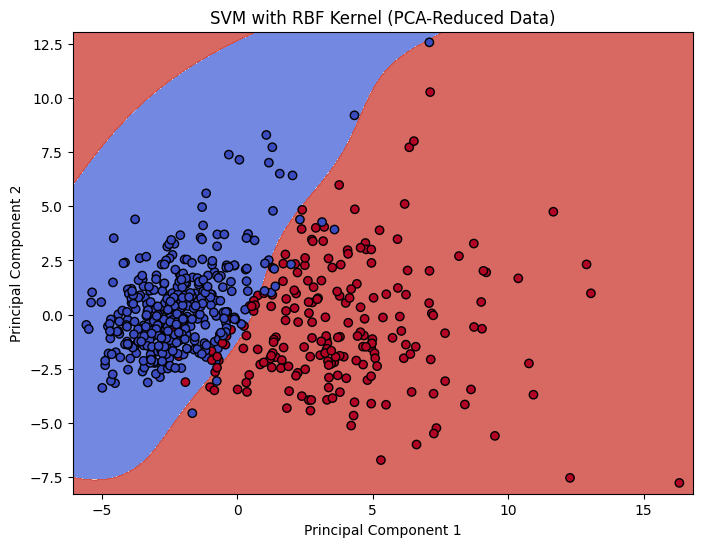

In [1]:
import kagglehub
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix

# Step 1: Download dataset using kagglehub
path = kagglehub.dataset_download("yasserh/breast-cancer-dataset")
print("Path to dataset files:", path)

# Step 2: Load dataset
csv_path = os.path.join(path, "breast-cancer.csv")
df = pd.read_csv(csv_path)

# Step 3: Prepare data
# Drop ID column if it exists
if 'id' in df.columns:
    df.drop(columns=['id'], inplace=True)

# Encode target (diagnosis: M=1, B=0)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Features and labels
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Step 4: Train SVM with linear kernel
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
acc_linear = accuracy_score(y_test, y_pred_linear)

# Step 5: Train SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
acc_rbf = accuracy_score(y_test, y_pred_rbf)

# Step 6: Evaluation
print("\n--- Evaluation ---")
print(f"Linear Kernel Accuracy: {acc_linear:.2f}")
print(f"RBF Kernel Accuracy: {acc_rbf:.2f}")

print("\nConfusion Matrix (Linear Kernel):")
print(confusion_matrix(y_test, y_pred_linear))

print("\nConfusion Matrix (RBF Kernel):")
print(confusion_matrix(y_test, y_pred_rbf))

# Step 7: Cross-validation
scores_linear = cross_val_score(svm_linear, X_pca, y, cv=5)
scores_rbf = cross_val_score(svm_rbf, X_pca, y, cv=5)

print("\nCross-validation Accuracy (Linear):", scores_linear.mean())
print("Cross-validation Accuracy (RBF):", scores_rbf.mean())

# Step 8: Visualization
def plot_decision_boundary(model, X, y, title):
    h = 0.01
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title(title)
    plt.show()

# Plot decision boundaries
plot_decision_boundary(svm_linear, X_pca, y, "SVM with Linear Kernel (PCA-Reduced Data)")
plot_decision_boundary(svm_rbf, X_pca, y, "SVM with RBF Kernel (PCA-Reduced Data)")
